In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 데이터 로딩
heart_data = pd.read_csv(r"C:\Users\splen\Desktop\machine-learning\textbook-practices\test-datasets\heart.csv")

In [5]:
heart_data.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


C:\Users\splen\AppData\Local\Temp\ipykernel_22376\1491720484.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\splen\AppData\Local\Temp\ipykernel_22376\1491720484.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\splen\AppData\Local\Temp\ipykernel_22376\1491720484.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\splen\AppData\Local\Temp\ipykernel_22376\1491720484.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\splen\AppData\Local\Temp\ipykernel_22376\1491720484.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\splen\AppData\Local\Temp\ipykernel_22376\1491720484.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\splen\AppData\Local\Temp\ipykernel_22376\1491720484.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\splen\AppDa

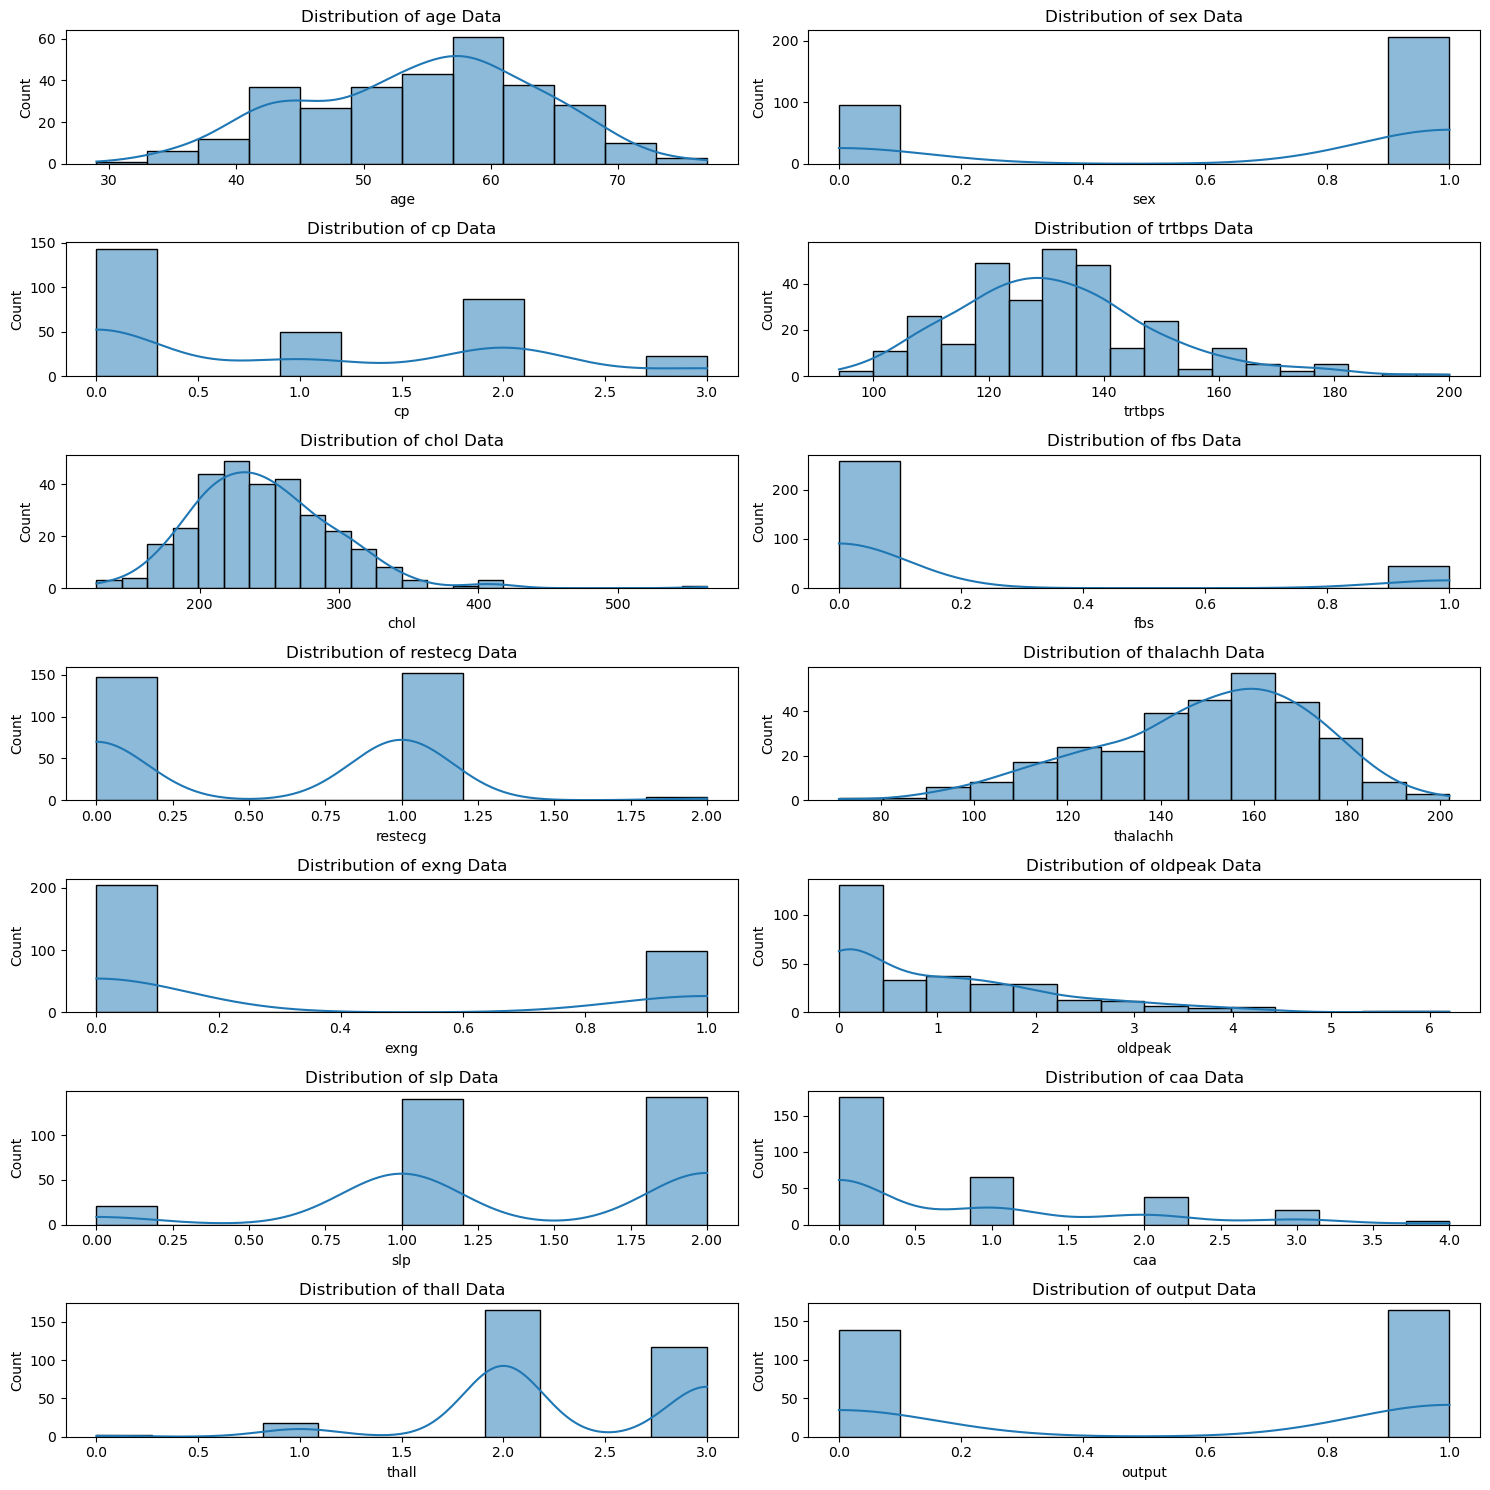

In [10]:
import seaborn as sns

# 피처 분포도 확인
plt.figure(figsize=(15,15))
for i,col in enumerate(heart_data.columns,1):
    plt.subplot(7,2,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(heart_data[col],kde=True)
    plt.tight_layout()
    plt.plot()

C:\Users\splen\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\splen\AppData\Local\Temp\ipykernel_22376\369762495.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


[]

<Figure size 1500x1000 with 0 Axes>

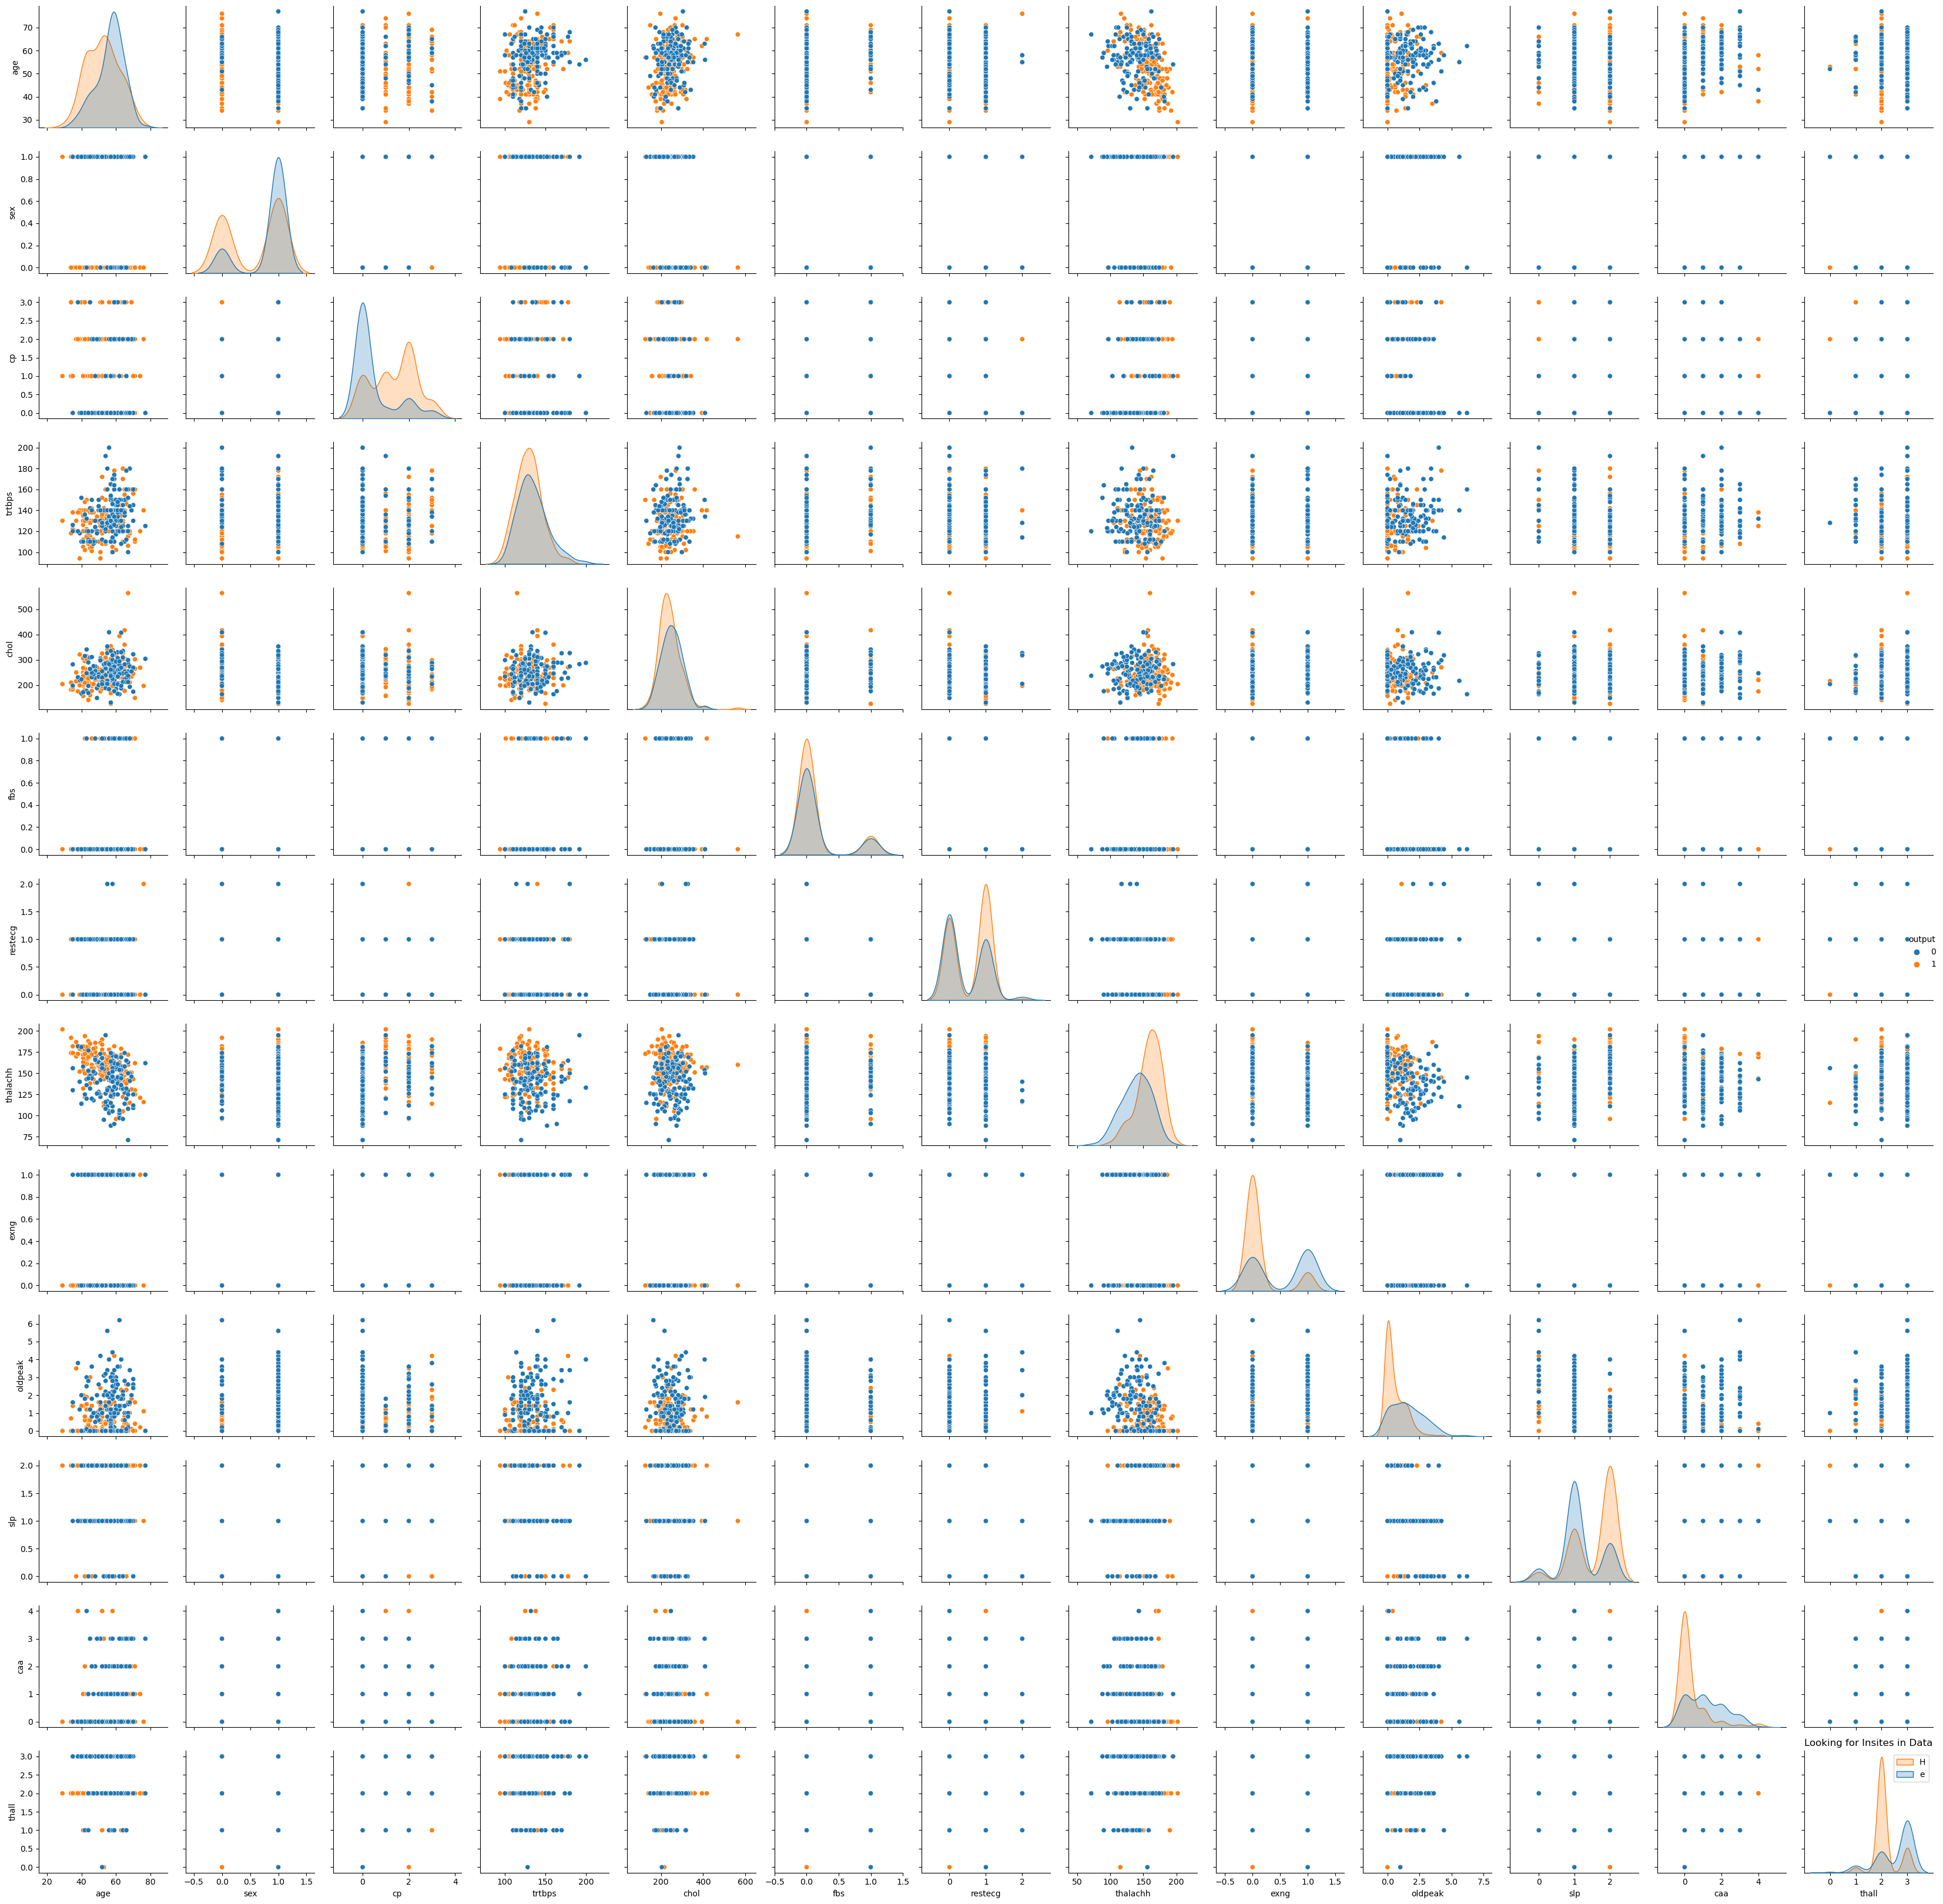

In [11]:
plt.figure(figsize=(15,10))
sns.pairplot(heart_data,hue="output")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

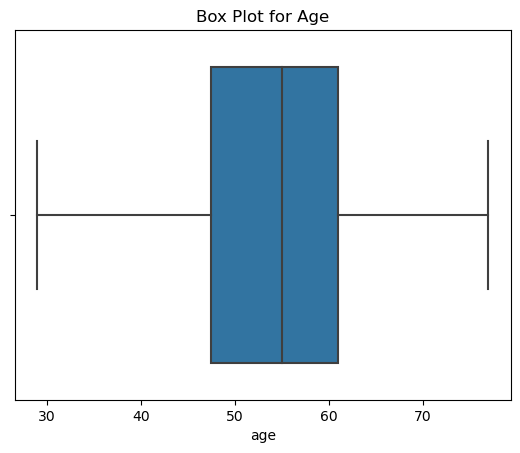

In [12]:
# 연속형 데이터 시각화
# 특정 feature에 대한 Box Plot
sns.boxplot(x=heart_data['age'])
plt.title('Box Plot for Age')
plt.show()

In [13]:
heart_data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


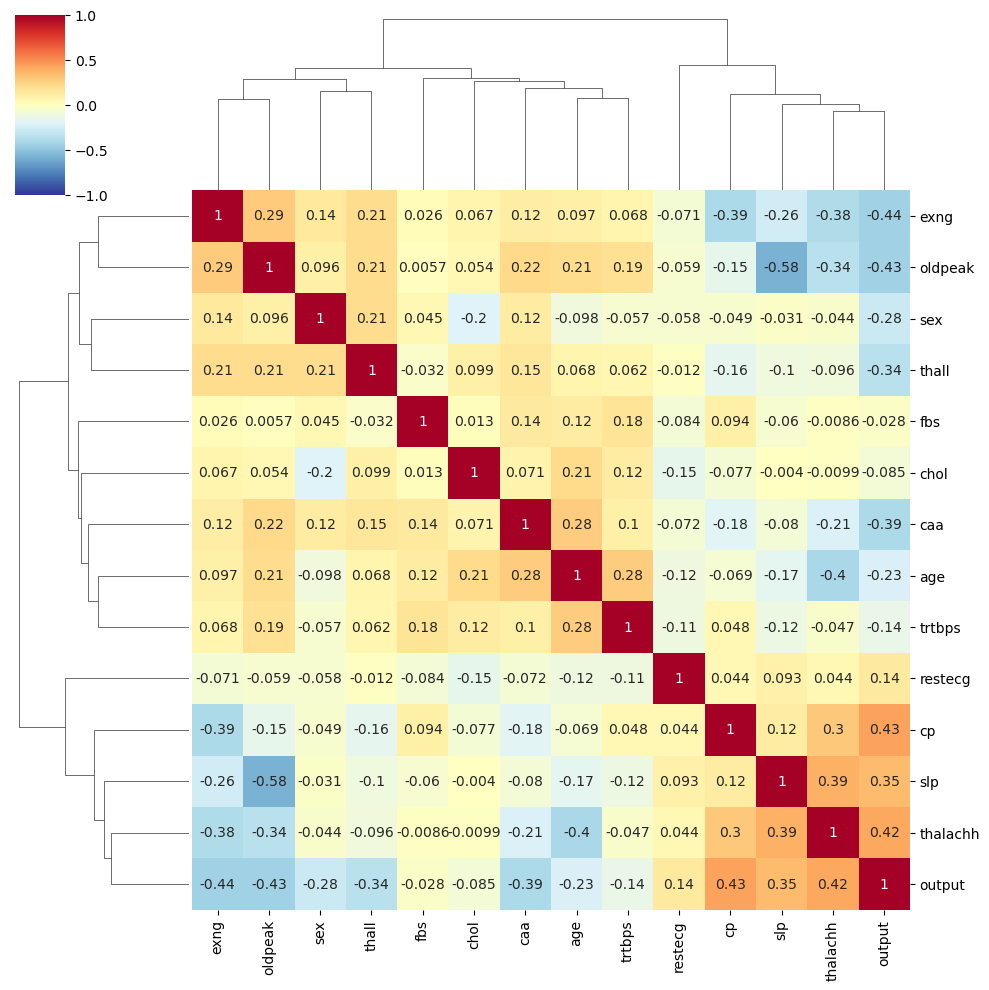

In [15]:
corr = heart_data.corr()

# 상관관계 시각화
# -1 또는 1에 가까울수록 상관관계 높은 것
sns.clustermap(corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [47]:
# 1사분위수(Q1) 및 3사분위수(Q3) 계산
Q1 = heart_data.quantile(0.25)
Q3 = heart_data.quantile(0.75)

# IQR 계산
IQR = Q3 - Q1

# 임계값 설정 (일반적으로 1.5 이상을 사용)
threshold = 1.5

# 이상치 제거
clean_data = heart_data[~((heart_data < (Q1 - threshold * IQR)) | (heart_data > (Q3 + threshold * IQR))).any(axis=1)]

In [48]:
clean_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


C:\Users\splen\AppData\Local\Temp\ipykernel_22376\2429028097.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\splen\AppData\Local\Temp\ipykernel_22376\2429028097.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\splen\AppData\Local\Temp\ipykernel_22376\2429028097.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\splen\AppData\Local\Temp\ipykernel_22376\2429028097.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\splen\AppData\Local\Temp\ipykernel_22376\2429028097.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\splen\AppData\Local\Temp\ipykernel_22376\2429028097.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\splen\AppData\Local\Temp\ipykernel_22376\2429028097.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\splen\AppDa

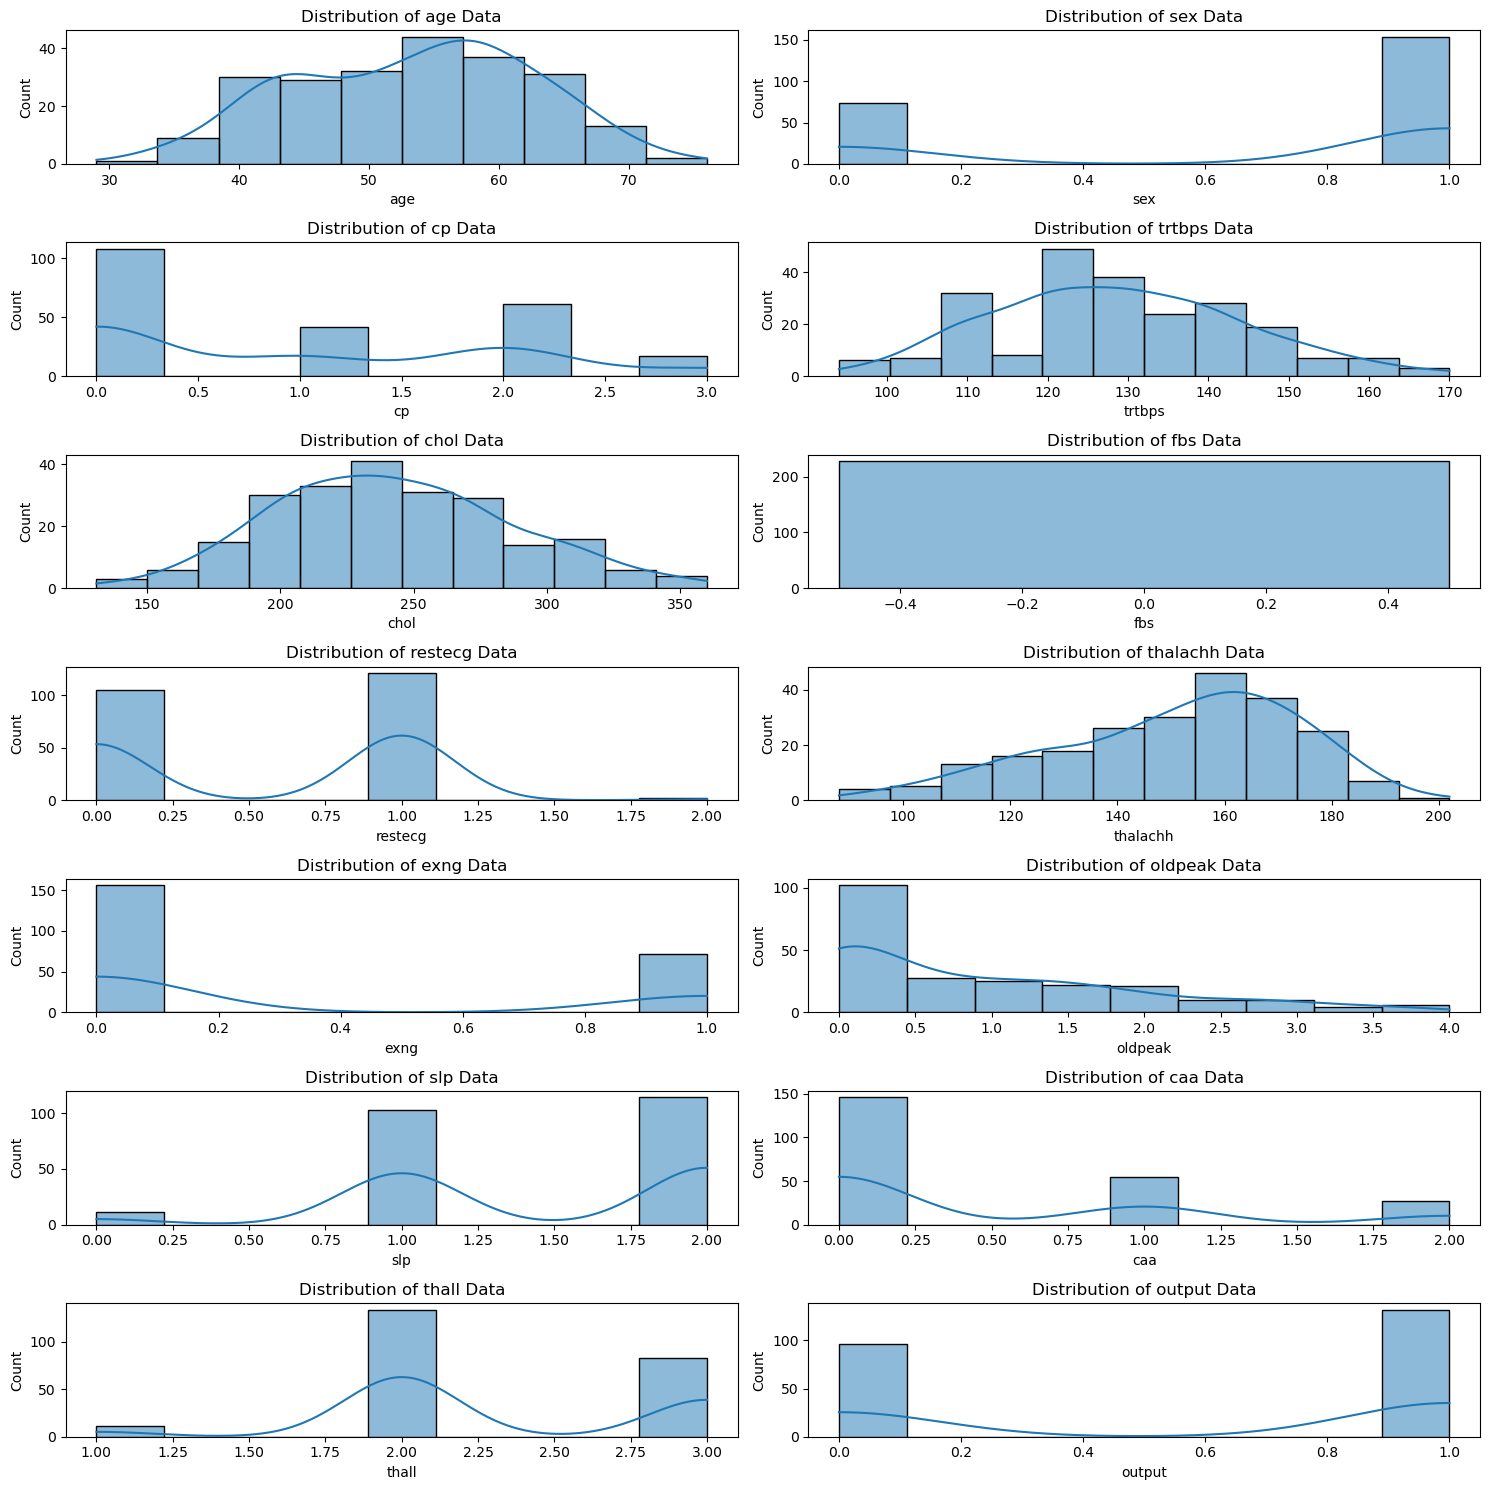

In [49]:
# 피처 분포도 확인
plt.figure(figsize=(15,15))
for i,col in enumerate(clean_data.columns,1):
    plt.subplot(7,2,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(clean_data[col],kde=True)
    plt.tight_layout()
    plt.plot()

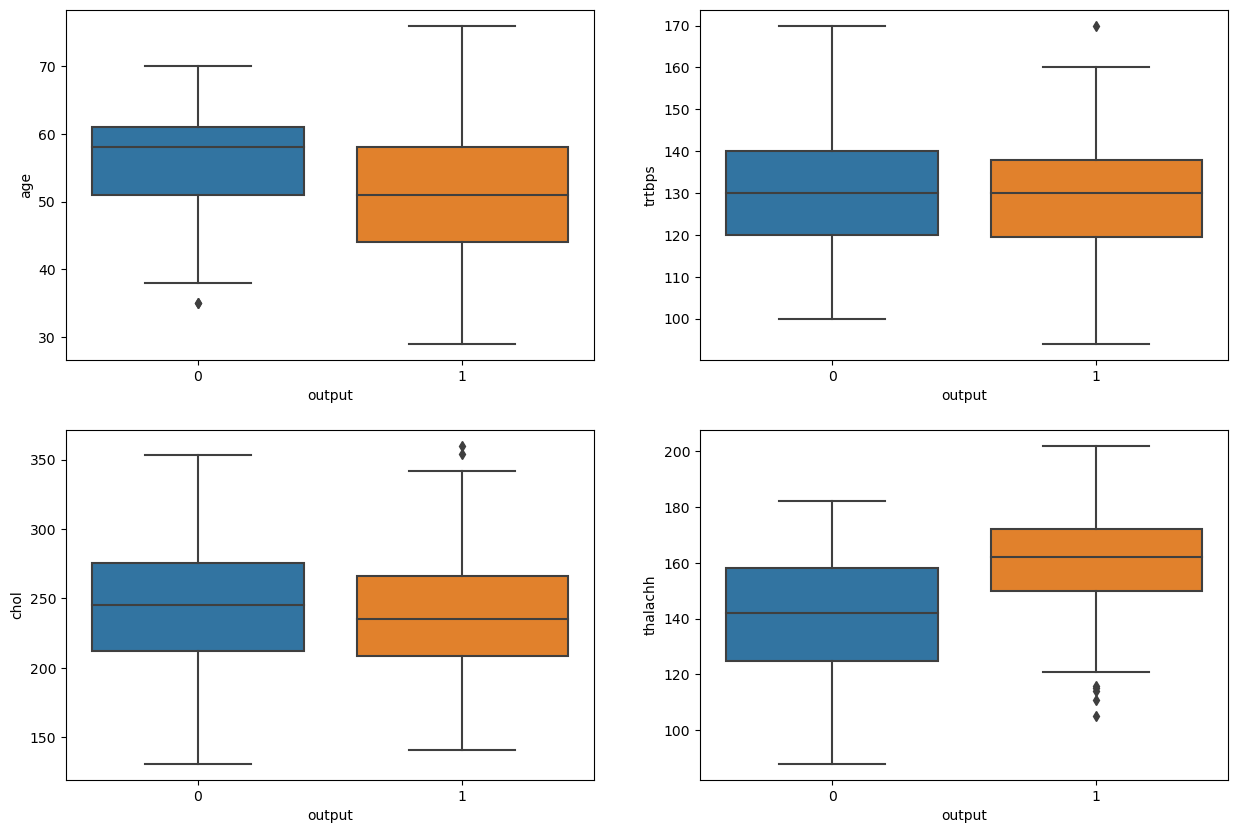

In [69]:
continuous_vars = ['age', 'trtbps', 'chol', 'thalachh']

# 플롯의 행과 열을 설정
n_rows = 2
n_cols = 2

# matplotlib의 subplots를 사용하여 여러 그래프를 그립니다.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# 각 변수에 대한 Boxplot을 그립니다.
for i, var in enumerate(continuous_vars):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x='output', y=var, data=clean_data, ax=axes[row, col])

In [73]:
from sklearn.preprocessing import RobustScaler

# creating a copy of df
df1 = clean_data

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = StandardScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,cp_1,cp_2,cp_3,restecg_1,restecg_2,slp_1,slp_2,thall_2,thall_3
1,-1.773674,0.086772,0.172434,1.600895,2.472003,True,False,False,False,False,True,False,True,False,False,False,True,False
2,-1.339305,0.086772,-0.867525,0.932553,0.439382,False,False,False,False,True,False,False,False,False,False,True,True,False
3,0.289579,-0.566164,-0.144075,1.199890,-0.141366,True,False,False,False,True,False,False,True,False,False,True,True,False
4,0.398172,-0.566164,2.523646,0.531547,-0.334949,False,True,False,False,False,False,False,True,False,False,True,True,False
5,0.398172,0.739707,-1.138819,-0.136795,-0.528532,True,False,False,False,False,False,False,True,False,True,False,False,False


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

# 학습용과 테스트용으로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 의사결정나무 모델 초기화
model = DecisionTreeClassifier(random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.6956521739130435
F1 Score: 0.75


In [76]:
from sklearn.ensemble import RandomForestClassifier

# 학습용과 테스트용으로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 초기화
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

C:\Users\splen\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.717391304347826
F1 Score: 0.7719298245614036


In [83]:
import xgboost as xgb

# 학습용과 테스트용으로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 초기화 및 학습
model = xgb.XGBClassifier(objective="multi:softmax", num_class=3, random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.8043478260869565
F1 Score: 0.8421052631578947


In [84]:
from sklearn.model_selection import GridSearchCV

# XGBoost 모델 초기화
model = xgb.XGBClassifier(random_state=42)

# 탐색할 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# GridSearchCV 객체 초기화
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델 가져오기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측
y_pred = best_model.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.9}
Accuracy: 0.782608695652174
F1 Score: 0.8275862068965517
